# Load aggregated values per ice shelf
## Making timeseries of area, damage, and Damage-fraction (ipv barchart)

In [1]:
import os
import rioxarray as rioxr
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import glob
import xarray as xr

import rasterio as rio

import pandas as pd 
import seaborn as sns
import dask

# Import user functions
import nbFunctions as myf 


In [2]:
homedir = '/Users/tud500158/Library/Mobile Documents/com~apple~CloudDocs/Documents/Documents - TUD500158/'

# tilepath_dmg = os.path.join(homedir,'Data/S1_SAR/tiles/dmg_tiled/')
# tilepath_dmg = os.path.join(homedir,'Data/RAMP/RAMP_tiled/dmg_tiled/')
path2iceshelves = os.path.join(homedir,'Data/Greene2022_AIS_coastlines/shapefiles/annual_iceshelf_polygons/revised_measures_greene/')
# path2iceshelves = os.path.join('/Users/tud500158/Documents/Data/QGis/revised_measures_greene-copy/')
path2savefig = os.path.join(homedir,'Data/NERD/plots_dev/')
path2data = os.path.join(homedir,'Data/NERD/DMG_aggregated/')
path2nc = os.path.join(homedir, 'Data/NERD/data_predictor/')

''' --------------
Get Shapefiles 
------------------ '''
# geojson
gridTiles_geojson_path = os.path.join(homedir,'Data/tiles/gridTiles_iceShelves_EPSG3031.geojson')
gridTiles = gpd.read_file(gridTiles_geojson_path)

# measures ice shelves
iceshelf_path_meas = os.path.join(homedir, 'QGis/Quantarctica/Quantarctica3/Glaciology/MEaSUREs Antarctic Boundaries/IceShelf/IceShelf_Antarctica_v02.shp')
iceshelf_poly_meas = gpd.read_file(iceshelf_path_meas)

# # # regions of interest for AIS
# roi_path = os.path.join(homedir, 'QGis/data_NeRD/plot_insets_AIS_regions.shp')
# roi_poly = gpd.read_file(roi_path)

# region_ID_list = roi_poly['region_ID'].to_list()
# region_ID_list


## redefined: SECTORS for AIS
sector_path = os.path.join(homedir, 'QGis/data_NeRD/plot_insets_AIS_sectors.shp')
sector_poly = gpd.read_file(sector_path)
sector_ID_list = sector_poly['sector_ID'].to_list()

sector_ID_list

['WS-2',
 'WIS',
 'EIS',
 'RS',
 'ASE',
 'BSE',
 'WS-1',
 'WS',
 'WIS-1',
 'WIS-2',
 'EIS-1',
 'EIS-2',
 'WIS-a',
 'WIS-b']

In [3]:

# # annual ice shelves
# iceshelf_df_1997 = gpd.read_file(os.path.join(path2iceshelves, 'iceshelf_polygon_measures_greene_1997.75.shp' ) )
# iceshelf_df_2000 = gpd.read_file(os.path.join(path2iceshelves, 'iceshelf_polygon_measures_greene_2000.2.shp' ) )
# iceshelf_df_2015 = gpd.read_file(os.path.join(path2iceshelves, 'iceshelf_polygon_measures_greene_2015.2.shp' ) )
# iceshelf_df_2016 = gpd.read_file(os.path.join(path2iceshelves, 'iceshelf_polygon_measures_greene_2016.2.shp' ) )
# iceshelf_df_2017 = gpd.read_file(os.path.join(path2iceshelves, 'iceshelf_polygon_measures_greene_2017.2.shp' ) )
# iceshelf_df_2018 = gpd.read_file(os.path.join(path2iceshelves, 'iceshelf_polygon_measures_greene_2018.2.shp' ) )
# iceshelf_df_2019 = gpd.read_file(os.path.join(path2iceshelves, 'iceshelf_polygon_measures_greene_2019.2.shp' ) )
# iceshelf_df_2020 = gpd.read_file(os.path.join(path2iceshelves, 'iceshelf_polygon_measures_greene_2020.2.shp' ) )
# iceshelf_df_2021 = gpd.read_file(os.path.join(path2iceshelves, 'iceshelf_polygon_measures_greene_2021.2.shp' ) )


# ishelf_dict = { '1997':iceshelf_df_1997,'2000':iceshelf_df_2000,'2015':iceshelf_df_2015,
#                 '2016':iceshelf_df_2016,'2017':iceshelf_df_2017,
#                 '2018':iceshelf_df_2018,'2019':iceshelf_df_2019,
#                 '2020':iceshelf_df_2020,'2021':iceshelf_df_2021,
# }        

# Load annual files per region and merge to annual-AIS-wide dataset of all ice shelves

In [4]:
# # region_ID_list
 

# # sector_IDs = [id for id in sector_ID_list if '-' not in id]
# # sector_IDs.sort()
# # sector_IDs

# sector_IDs= ['ASE', 'BSE', 'EIS', 'RS', 'WIS-a','WIS-b', 'WS']

# PLOTS for sectors

In [5]:
from cycler import cycler

# plt.rcParams.update({'font.size': 16})
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18
fs=14
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


''' --------
COLORS
-----------'''

# currentdir = os.getcwd()
# os.chdir('../files/')
# import hawaiiS
# os.chdir(currentdir)

# cm_data = hawaiiS.cm_data
# # hawaii_cat = LinearSegmentedColormap.from_list('hawaii', cm_data) 
# # hawaii_cat
# hawaii_cat = sns.color_palette(cm_data,6)
# hawaii_cat

# cubeH_palette
print('cubeH_palette for sectors')
cubeH_palette = sns.color_palette("cubehelix", 9)[2:-1]
display(sns.color_palette(cubeH_palette))

## Can look for different shades of HEX here: https://www.color-hex.com/color/721f82

## DMG cmap
# 
### Damage classes
magma_palette_r = sns.color_palette('magma_r',5) # ['#3b0f70', '#8c2981', '#de4968', '#fe9f6d']
bblue_rgb = (0.6352941176470588, 0.8117647058823529, 0.996078431372549)
magma_palette_r.insert(0,bblue_rgb)
print('magma_palette')
display(magma_palette_r)


### Timeseires 1997; 2015-2021
my_palette = sns.color_palette('crest',5) # can access i'th color by indexing
my_palette2 = ['salmon']+ my_palette
rgb_salmon = np.array([250,128,114])/255

my_palette2long = ['salmon']+ sns.color_palette('crest',7) 
rgb_salmon = tuple(np.array([250,128,114])/255)
my_palette2long = [rgb_salmon]+ sns.color_palette('crest',7) 
my_palette2rgb = [tuple(rgb_salmon)] + my_palette2long[1:] # only rgb values
print('Palette-long')
display(sns.color_palette(my_palette2rgb))

print('magma palette_r : ', magma_palette_r.as_hex()) #[ '#A2CEFE',    '#FFAF78',    '#F1675D',    '#B54279',    '#721F82',    '#2B114F']
print('Palette-long: temporal_pallete 1997+crest : ', sns.color_palette(my_palette2long).as_hex()) 

# my_palette2long = list(rgb_salmon)+ sns.color_palette('crest',7) 
# sns.color_palette('crest',7) 
# sns.color_palette('#fa8072',1)

cubeH_palette for sectors


[(0.11789134778719829, 0.39694259707734425, 0.2588678372388254),
 (0.3292772926340829, 0.4762845556584382, 0.1837155549758328),
 (0.6328422475018423, 0.4747981096220677, 0.29070209208025455),
 (0.8146245329198283, 0.49548316572322215, 0.5752525936416857),
 (0.812420762188067, 0.6167295569758052, 0.8578575836301946),
 (0.7587183008012618, 0.7922069335474338, 0.9543861221913403)]

magma_palette


[(0.6352941176470588, 0.8117647058823529, 0.996078431372549),
 (0.997077, 0.690088, 0.471811),
 (0.944006, 0.377643, 0.365136),
 (0.709962, 0.212797, 0.477201),
 (0.445163, 0.122724, 0.506901),
 (0.171713, 0.067305, 0.370771)]

Palette-long


[(0.9803921568627451, 0.5019607843137255, 0.4470588235294118),
 (0.50711872, 0.73665492, 0.56821764),
 (0.37890483, 0.66859548, 0.56566462),
 (0.28251558, 0.59517119, 0.56181204),
 (0.20094292, 0.52087429, 0.55342884),
 (0.12709242, 0.44601517, 0.54438795),
 (0.11646936, 0.36578429, 0.52726234),
 (0.15138673, 0.27982444, 0.49119848)]

magma palette_r :  ['#a2cffe', '#feb078', '#f1605d', '#b5367a', '#721f81', '#2c115f']
Palette-long: temporal_pallete 1997+crest :  ['#fa8072', '#81bc91', '#61aa90', '#48988f', '#33858d', '#20728b', '#1e5d86', '#27477d']


moa color steps


[(0.9803921568627451, 0.5215686274509804, 0.4745098039215686),
 (0.9803921568627451, 0.7764705882352941, 0.4745098039215686),
 (0.6235294117647059, 0.796078431372549, 0.6705882352941176)]

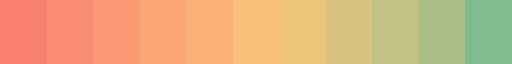

moa_palette


[(0.9803921568627451, 0.5019607843137255, 0.4470588235294118),
 (0.9803921568627451, 0.6017825311942959, 0.4570409982174688),
 (0.9803921568627451, 0.7515151515151515, 0.47201426024955434),
 (0.8509803921568627, 0.7657754010695187, 0.5001782531194295),
 (0.50711872, 0.73665492, 0.56821764),
 (0.37890483, 0.66859548, 0.56566462),
 (0.28251558, 0.59517119, 0.56181204),
 (0.20094292, 0.52087429, 0.55342884),
 (0.12709242, 0.44601517, 0.54438795),
 (0.11646936, 0.36578429, 0.52726234),
 (0.15138673, 0.27982444, 0.49119848)]

In [7]:
import matplotlib.colors as mcolors
import numpy as np

moa_colors = ['#fa8579','#fac679','#9fcbab']
custom_palette = sns.color_palette(moa_colors)
print('moa color steps')
display(custom_palette)

start_color = mcolors.hex2color('salmon')
middle_color = mcolors.hex2color('#fac679')
end_color = mcolors.hex2color('#81bc91')

n_colors = 7  # Number of colors between the start and end colors
n_colors = 11  # Number of colors between the start and end colors

def make_cmap(start_color, end_color, middle_color=None , n_colors=11):
    if middle_color is not None:

        colors = [start_color]

        for i in range(1, n_colors - 1):
            if i < n_colors / 2:
                # Interpolate between the start color and the middle color
                r = start_color[0] + (middle_color[0] - start_color[0]) * (i / (n_colors / 2))
                g = start_color[1] + (middle_color[1] - start_color[1]) * (i / (n_colors / 2))
                b = start_color[2] + (middle_color[2] - start_color[2]) * (i / (n_colors / 2))
            else:
                # Interpolate between the middle color and the end color
                r = middle_color[0] + (end_color[0] - middle_color[0]) * ((i - n_colors / 2) / (n_colors / 2))
                g = middle_color[1] + (end_color[1] - middle_color[1]) * ((i - n_colors / 2) / (n_colors / 2))
                b = middle_color[2] + (end_color[2] - middle_color[2]) * ((i - n_colors / 2) / (n_colors / 2))
            
            colors.append((r, g, b))
        colors.append(end_color)
        custom_colormap = mcolors.LinearSegmentedColormap.from_list('custom_colormap', colors, N=n_colors)
    else:
        colors =[start_color, end_color]
        custom_colormap = mcolors.LinearSegmentedColormap.from_list('custom_colormap', colors, N=n_colors)

    return custom_colormap 

custom_colormap = make_cmap( start_color, end_color, middle_color=middle_color , n_colors=11) 

display(custom_colormap)

# Now, you can use the custom_colormap in your visualizations
print('moa_palette')
moa_palette = [custom_colormap(2), custom_colormap(5),custom_colormap(7)]
sns.color_palette(moa_palette)

### ADD TO PALETTE 
my_palette_0421 = ['salmon'] + moa_palette + sns.color_palette('crest',7) 
sns.color_palette(my_palette_0421)

In [8]:
# ## Npx hex
# c1 = '#98d7c8' # '#7FCDBB'
# c2 = '#081D58'
# cmap_blues = make_cmap( c1,  c2, middle_color=None , n_colors=11) 
# cmap_blues = mcolors.LinearSegmentedColormap.from_list('custom_colormap', ['#98d7c8','#1d91c0','#394a79'], N=n_colors)
# cmap_blues


# # ch_cmap = sns.color_palette("cubehelix", 9).as_hex()[:-1]
# cmap_cubeH = mcolors.LinearSegmentedColormap.from_list('custom_colormap', cubeH_palette, N=n_colors)


# Load data

In [17]:
## Drop splitparts of sectors
sector_df = sector_poly.copy()
sector_df = sector_df.drop(sector_df.index[ sector_df['sector_ID'].isin(
                            ['WS-1','WS-2','WIS','WIS-1','WIS-2','EIS-1','EIS-2']) ], axis=0)
sector_df

''' ---------
### SELECT SUBDIR
------------ '''
# subdir = '_aggregated_with_nodataMask_15-21/' # Masked RAMP and S1, but doesnt account for annual data gaps
# subdir = '_aggregated_with_nodataMask_annual/'  # Masked RAMP 15-21 and S1 annual, but cant distinguish annual gap from None-coverage gap
# subdir = '_aggregated_with_nodataMask_annual_fill2values/'  # Masked RAMP 15-21 and S1 annual, annual gaps should be -888 and nodata of all years is -999
years_list = np.concatenate([np.array([1997]), np.arange(2015,2022)])

## Load DOWNSAMPLED data so every year is comparable
subdir = '_aggregated_with_nodataMask_any/' ## strict mask. If any px has nodata in a year, its removed.
# years_list = [1997, 2004, 2009, 2014]+ list(np.arange(2015,2022)) ## can do all years together for downsampled (nodataMask_any or nodataMask_anual)
years_list = [1997]+ list(np.arange(2015,2022)) ## can do all years together for downsampled (nodataMask_any or nodataMask_anual)
downsampled = True 

path2agg = os.path.join(path2data, subdir)

## Load file list
df_file_list_all = glob.glob(path2agg + 'aggregated_dmg_per_iceshelf*.shp')
df_file_list_all.sort()

''' ---------
### SELECT RESOLUTION
------------ '''
if downsampled:
    ## DOWNSAMPLED AIS SHPfiles
    df_file_list = [file for file in df_file_list_all if 'downsampled' in file] ## downsampled 1000m values for 2015-2021
    fname_suffix = '_downsampled.shp'

    ## HIGH RES:
    # df_file_list = [file for file in df_file_list_all if 'downsampled' not in file] ## high-res 400m values
    # df_file_list = [file for file in df_file_list if '1000m' not in file] ## high-res 400m values
    # fname_suffix = '.shp'

else:
    df_file_list = df_file_list_all
    # print(df_file_list)

    

''' ---------
### Load all (downsampled) AIS shapefiles
------------ '''
df_data=pd.DataFrame()
for year in years_list:
    print("Loading {}".format(year))
    sector_df_list =[]
    iceshelves_df_list=[]

    # df_year_AIS_file = 'aggregated_dmg_per_iceshelf_AIS_' + str(year) + '.shp'

    df_year_AIS_file = [file for file in df_file_list if str(year) in file][0]

    ## Load data
    df_year_AIS = gpd.read_file(os.path.join(path2agg,df_year_AIS_file))
    

    # df_year_AIS['ratio']= (df_year_AIS['#DMG']/df_year_AIS['Npx']*100).round(1)

    ## intersect iceshelf gpd with sector for SNS grouping
    df_year_AIS = gpd.sjoin(df_year_AIS, sector_df, how='right').drop(['index_left','x_label','y_label'],axis=1)
    df_year_AIS['time']=year

    df_data_tmp = df_year_AIS # [['time','sector_ID','NAME', 'index_left','Npx','#DMG','ratio']]
    df_data = pd.concat([df_data, df_data_tmp])

df_data.head()
    
''' ---------
### Load also the originally low-res 1000m-resolution AIS shpaefiles (to compare 1997/2021 with/without downsampling
------------ '''
df_data_1000=pd.DataFrame()
for year in [1997, 2021]:
    print("Loading 1000m {}".format(year))
    sector_df_list =[]
    iceshelves_df_list=[]

    df_year_AIS_file = 'aggregated_dmg_per_iceshelf_AIS_' + str(year) + '_1000m.shp'
    df_year_AIS = gpd.read_file(os.path.join(path2agg,df_year_AIS_file))
    
    ## intersect iceshelf gpd with sector for SNS grouping
    df_year_AIS = gpd.sjoin(df_year_AIS, sector_df, how='right').drop(['index_left','x_label','y_label'],axis=1)
    df_year_AIS['time']=year
    df_data_1000 = pd.concat([df_data_1000, df_year_AIS])

display(df_data.head())


Loading 1997
Loading 2015
Loading 2016
Loading 2017
Loading 2018
Loading 2019
Loading 2020
Loading 2021
Loading 1000m 1997
Loading 1000m 2021


,NAME,Dsum,Npx,#DMG,#noDMG,#nodata,#lowDMG,#mediumDMG,#highDMG,sector_ID,sectorNAME,geometry,time
2,Underwood,1.555903,158,112,46,0,75,33,4,EIS,East Indian,"POLYGON ((2742417.175 -38120.436, 2838893.457 ...",1997
2,Vincennes_Bay,22.954164,668,533,135,0,215,249,69,EIS,East Indian,"POLYGON ((2742417.175 -38120.436, 2838893.457 ...",1997
2,Fox,3.920349,27,27,0,0,4,11,12,EIS,East Indian,"POLYGON ((2742417.175 -38120.436, 2838893.457 ...",1997
2,Whittle,3.428136,87,83,4,0,10,68,5,EIS,East Indian,"POLYGON ((2742417.175 -38120.436, 2838893.457 ...",1997
2,Williamson,3.791310,175,171,4,0,49,119,3,EIS,East Indian,"POLYGON ((2742417.175 -38120.436, 2838893.457 ...",1997


#### Combine WIS-a and WIS-b

In [18]:
# df_data_1000

## Combine WIS-a and WIS-b 
# # -- er zit helemaal geen overlap in haha, dus kan gewoon WIS-a and WIS-b hernoement tot 'WIS'
# df_data.loc[df_data['sector_ID'].isin(['WIS-a','WIS-b'])].groupby(['NAME','time']).sum().reset_index() 

# df_data.loc[df_data['sector_ID'].isin(['WIS-a','WIS-b'])]
# df_data.loc[df_data['sector_ID'] == 'WIS-a']['NAME'].unique(), df_data.loc[df_data['sector_ID'] == 'WIS-b']['NAME'].unique()

## Combine WIS-a and WIS-b : replace values
df_data['sector_ID'] = df_data['sector_ID'].replace(['WIS-a', 'WIS-b'], 'WIS')
df_data_1000['sector_ID'] = df_data_1000['sector_ID'].replace(['WIS-a', 'WIS-b'], 'WIS')
sector_IDs = df_data['sector_ID'].unique()
sector_IDs.sort()
sector_IDs

array(['ASE', 'BSE', 'EIS', 'RS', 'WIS', 'WS'], dtype=object)

# Plot timeseires

In [12]:
sectors = df_data['sector_ID'].unique()
sectors = ['ASE', 'BSE', 'WS','EIS', 'RS' , 'WIS']

## Plot for few ice shelves

In [14]:
def plot_axes_area_dmg(ax, data_plot, 
                        yvar_left=('#DMG', 'Damage area (px)'), 
                        yvar_right=('Npx', 'Ice shelf area(px)'),
                        yscale_log=False,
                        ax_title = '',
                        ):

    years_plot = [str(y) for y in list(data_plot['time'].unique())]
    x2 = np.arange(1,len(years_plot)+1) # data_plot['time'] #  data_nerd['time']
    ax2 = ax.twinx()

    ''' -----------------
    ## Left y-axis
    ----------------- '''
    ''' Damage Area '''
    # yvar = '#DMG'; yname='Damage area (px)'
    yvar, yname = yvar_left
    ycol='#721f81'; ystyle='^';
    h1= ax.plot(x2[1:], data_plot.loc[data_plot['time']>2014][yvar].values, color=ycol,label=yvar)
    ax.scatter(x2, data_plot[yvar] ,c=ycol,marker=ystyle,label='_nolegend_') # my_palette2long) 
    if yscale_log:
        ax.set_yscale('log')
    ax.set_ylabel(yname)

    # Set the color of the right-hand sided y-axis label and tick labels
    ax.yaxis.label.set_color(ycol)
    ax.tick_params(axis='y', colors=ycol,which='both')
    ax.spines['left'].set_color(ycol)

    ## general axis stuff
    ax.set_title(ax_title)
    ax.set_xticks(x2, years_plot, rotation=45) 
    ax.grid('major',color=[0.9, 0.9, 0.9],which='both')
    

    ''' -----------------
    ## Right y-axis
    ----------------- '''
    ''' Ice Shelf Area '''
    yvar, yname = yvar_right
    ycol = '#579a4b'; ystyle='x'
    h2 = ax2.plot(x2[1:], data_plot.loc[data_plot['time']>2014][yvar].values, color=ycol,label=yvar)
    ax2.scatter(x2, data_plot[yvar] ,c=ycol,marker=ystyle,label='_nolegend_')# my_palette2long) 

    if yscale_log:
        ax2.set_yscale('log')
    ax2.set_ylabel(yname)
    
    # Set the color of the right-hand sided y-axis label and tick labels
    ax2.yaxis.label.set_color(ycol)
    ax2.tick_params(axis='y', colors=ycol,which='both') # doesnt work
    ax2.spines['right'].set_color(ycol)

    # # Legend handles for Shared Xax
    # lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    # lines, labels = [sum(tmp, []) for tmp in zip(*lines_labels)]
    # # fig.legend(lines, labels, loc='upper right', bbox_to_anchor = (-0.15, -0.1, 1, 1))
    # fig.legend(lines, labels, loc='upper left', bbox_to_anchor = (1, -0.1, 1, 1))

    return ax, ax2

def plot_axes_area_dmg_dfrac(ax, data_plot, 
                        yvar_left1=('#DMG', 'Damage area (px)'), 
                        yvar_left2=('Npx', 'Ice shelf area(px)'), 
                        yvar_right=('Dfrac', 'Dfrac(%)'),
                        yscale_log=False,
                        ax_title = '',
                        add_legend=True,
                        ):
    years_plot = [str(y) for y in list(data_plot['time'].unique())]
    x2 = np.arange(1,len(years_plot)+1) # data_plot['time'] #  data_nerd['time']
    ax2 = ax.twinx()
    ax.grid('major',color=[0.9, 0.9, 0.9],which='both')

    ''' -----------------
    ## Left y-axis
    ----------------- '''
    ''' Damage Area '''
    # yvar = '#DMG'; yname='Damage area (px)'
    yvar, yname = yvar_left1
    ycol='#721f81'; ystyle='^';
    h1= ax.plot(x2[1:], data_plot.loc[data_plot['time']>2014][yvar].values, color=ycol,label='dmg')
    ax.scatter(x2, data_plot[yvar] ,c=ycol,marker=ystyle,label='_nolegend_') # my_palette2long) 
    if yscale_log:
        ax.set_yscale('log')
    if 'px' in yname:
        ax.set_ylabel('Area (px)')
    if 'km' in yname:
        ax.set_ylabel('Area ($km^2$)')


    ''' Ice Shelf Area '''
    # yvar = 'Npx'; yname='Ice shelf area(px)'
    yvar, yname = yvar_left2
    ycol = '#579a4b'; ystyle='x';
    h2 = ax.plot(x2[1:], data_plot.loc[data_plot['time']>2014][yvar].values, color=ycol,label='ishelf')
    ax.scatter(x2, data_plot[yvar] ,c=ycol,marker=ystyle,label='_nolegend_')# my_palette2long) 

    ## general axis stuff
    ax.set_title(ax_title)
    ax.set_xticks(x2, years_plot, rotation=45) 
    # ax.grid('major',color=[0.9, 0.9, 0.9],which='both')
    
    ## add legend
    if add_legend:
        ax.legend()

    ''' -----------------
    ## Right y-axis
    ----------------- '''
    ''' Dmg Frac'''
    yvar = 'Dfrac'; yname='Damage Fraction (%)'
    ycol = '#d3802b'; ystyle='o';
    h2 = ax2.plot(x2[1:], data_plot.loc[data_plot['time']>2014][yvar].values, color=ycol,label='fraction')
    ax2.scatter(x2, data_plot[yvar] ,c=ycol,marker=ystyle,label='_nolegend_')# my_palette2long) 
    
    # if yscale_log:
    #     ax2.set_yscale('log')

    ax2.set_ylabel(yname)

    ## make sure the ylims are generous
    ylims = ax2.get_ylim()
    if np.diff(ylims) < 10:
        # print('small % diff: ', ylims)
        ymid = ylims[0]+ np.diff(ylims)/2
        ylim_new = [ymid-5, ymid+5]
        ax2.set_ylim(ylim_new)

    
    # Set the color of the right-hand sided y-axis label and tick labels
    ax2.yaxis.label.set_color(ycol)
    ax2.tick_params(axis='y', colors=ycol,which='both') # doesnt work
    ax2.spines['right'].set_color(ycol)

    return ax, ax2

.. Saving  plot_timeseries_Area-DMG_annual_iceshelves


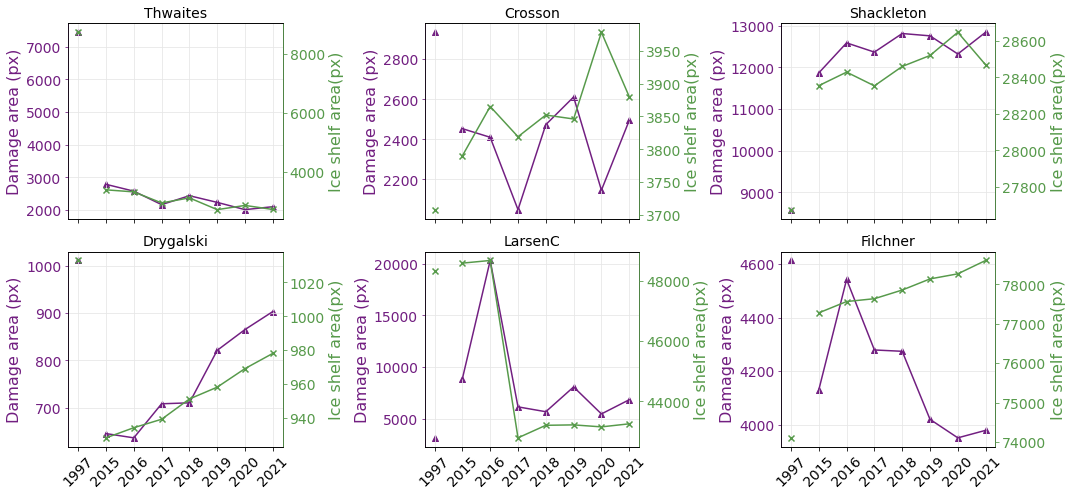

In [19]:

df_nerd = df_data[~df_data['time'].between(2004, 2014)]
years_nerd = [str(y) for y in list(df_nerd['time'].unique())]
years_nerd


''' -----------------
## SUBPLOTS ICE SHELF
----------------- '''

fig, axs = plt.subplots(2, 3, figsize=(15, 7), sharex=True ) 
r=0;c=0
for i, ishelf in enumerate(['Thwaites','Crosson','Shackleton','Drygalski','LarsenC','Filchner']):
    data_plot = df_nerd.loc[df_nerd['NAME'] == ishelf]
    ax = axs[r, c]

    ax, ax2 = plot_axes_area_dmg(ax, data_plot, 
                        yvar_left=('#DMG', 'Damage area (px)'), 
                        yvar_right=('Npx', 'Ice shelf area(px)'),
                        yscale_log=False,
                        ax_title = ishelf,
                        )

    c+=1; 
    if c>2:  c=0; r+=1

fig.tight_layout()

## SAVE FIGURE
fname = 'plot_timeseries_Area-DMG_annual_iceshelves'
print('.. Saving ', fname)
# fig.savefig(os.path.join(path2savefig,'bar_plots',fname+'.png' ), bbox_inches='tight')
# fig.savefig(os.path.join(path2savefig,'bar_plots',fname+'.jpg' ), bbox_inches='tight')






' -----------------\n## SUBPLOTS ICE SHELF\n----------------- '

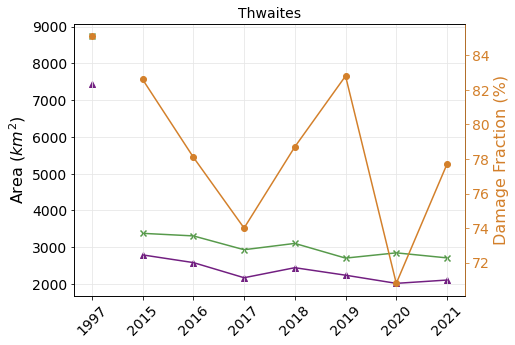

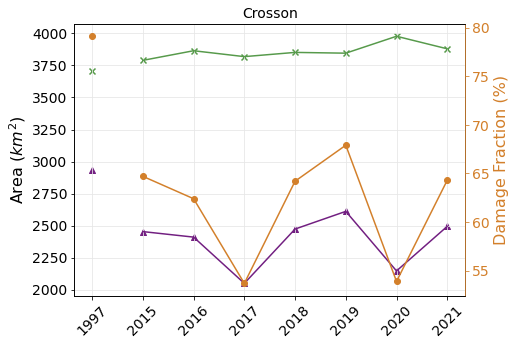

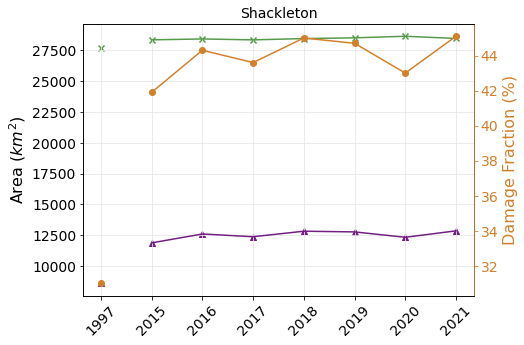

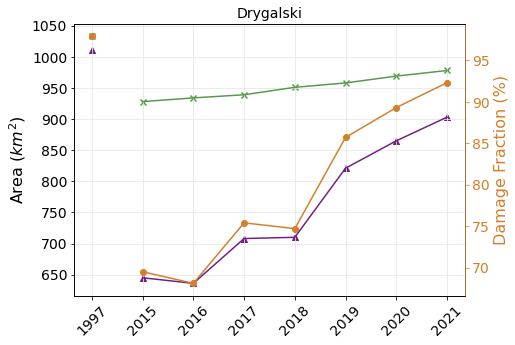

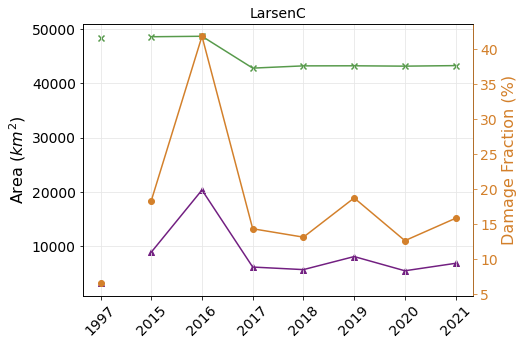

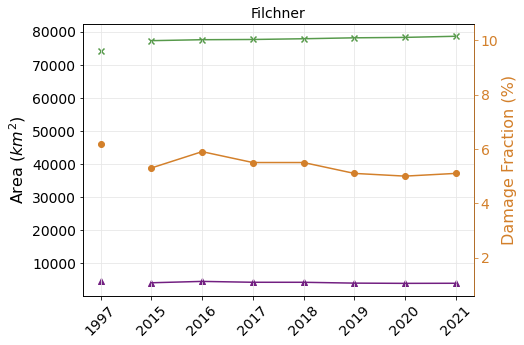

In [20]:


df_nerd = df_data[~df_data['time'].between(2004, 2014)].copy()
df_nerd['Dfrac'] = (df_nerd['#DMG']/df_nerd['Npx']*100).round(1) 
years_nerd = [str(y) for y in list(df_nerd['time'].unique())]
years_nerd


## area in km2 instead of px
px_res = 1000 ## used downsampled data
df_nerd['Area(km2)'] = df_nerd['Npx']*px_res*px_res/(1e6)
df_nerd['DMG(km2)'] = df_nerd['#DMG']*px_res*px_res/(1e6)

''' -----------------
## SINGLE PLOT PER ICE SHELF
----------------- '''
for i, ishelf in enumerate(['Thwaites','Crosson','Shackleton','Drygalski','LarsenC','Filchner']):
    data_plot = df_nerd.loc[df_nerd['NAME'] == ishelf]

    fig, axs = plt.subplots(1, figsize=(7, 5), sharex=True ) 
    ax = axs
    ax, ax2 = plot_axes_area_dmg_dfrac(ax, data_plot, 
                        # yvar_left1=('#DMG', 'Damage area (px)'), 
                        # yvar_left2=('Npx', 'Ice shelf area(px)'), 
                        yvar_left1=('DMG(km2)', 'Damaged area (km2)'), 
                        yvar_left2=('Area(km2)', 'Ice shelf area (km2)'), 
                        yvar_right=('Dfrac', 'Dfrac(%)'),
                        yscale_log=False,
                        ax_title = ishelf,
                        )
    # Remove the legend
    ax.legend().set_visible(False)

    # ### SAVE FIGURE
    # fname = 'plot_timeseries_Area-DMG-Dfrac_annual_ishelf_'+ishelf 
    # print('.. Saving ', fname)
    # # fig.savefig(os.path.join(path2savefig,'bar_plots',fname +'.png'), bbox_inches='tight')
    # fig.savefig(os.path.join(path2savefig,'bar_plots',fname +'.pdf'), bbox_inches='tight')








In [21]:
# show some values
df_nerd = df_data[~df_data['time'].between(2004, 2014)].copy()
df_nerd['Dfrac'] = (df_nerd['#DMG']/df_nerd['Npx']*100).round(1) 
years_nerd = [str(y) for y in list(df_nerd['time'].unique())]
years_nerd

data_tmp = df_nerd.loc[df_nerd['NAME'].isin( ['Thwaites','Crosson','Shackleton','Drygalski','LarsenC','Filchner'] ) ]
data_tmp = data_tmp.sort_values(['NAME','time'])[['NAME','time','Npx','#DMG','Dfrac']]
data_tmp[data_tmp['time'].isin([1997,2015,2021])]

,NAME,time,Npx,#DMG,Dfrac
4,Crosson,1997,3708,2934,79.1
4,Crosson,2015,3790,2453,64.7
4,Crosson,2021,3880,2494,64.3
3,Drygalski,1997,1033,1011,97.9
3,Drygalski,2015,928,645,69.5
3,Drygalski,2021,978,903,92.3
7,Filchner,1997,74105,4613,6.2
7,Filchner,2015,77276,4130,5.3
7,Filchner,2021,78605,3979,5.1
7,LarsenC,1997,48322,3128,6.5


### Add shaded areas for ranges

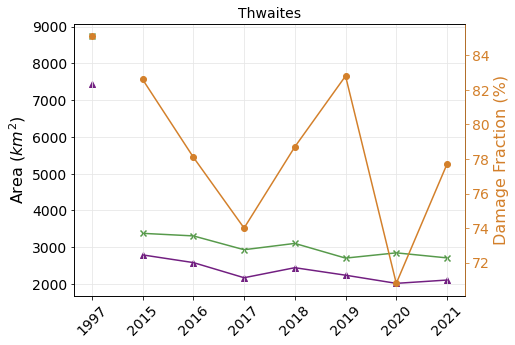

In [21]:


df_nerd = df_data[~df_data['time'].between(2004, 2014)].copy()
df_nerd['Dfrac'] = (df_nerd['#DMG']/df_nerd['Npx']*100).round(1) 
years_nerd = [str(y) for y in list(df_nerd['time'].unique())]
years_nerd


## area in km2 instead of px
px_res = 1000 ## used downsampled data
df_nerd['Area(km2)'] = df_nerd['Npx']*px_res*px_res/(1e6)
df_nerd['DMG(km2)'] = df_nerd['#DMG']*px_res*px_res/(1e6)

''' -----------------
## SINGLE PLOT PER ICE SHELF
----------------- '''
for i, ishelf in enumerate(['Thwaites']):#,'Crosson','Shackleton','Drygalski','LarsenC','Filchner']):
    data_plot = df_nerd.loc[df_nerd['NAME'] == ishelf]

    fig, axs = plt.subplots(1, figsize=(7, 5), sharex=True ) 
    ax = axs
    ax, ax2 = plot_axes_area_dmg_dfrac(ax, data_plot, 
                        # yvar_left1=('#DMG', 'Damage area (px)'), 
                        # yvar_left2=('Npx', 'Ice shelf area(px)'), 
                        yvar_left1=('DMG(km2)', 'Damaged area (km2)'), 
                        yvar_left2=('Area(km2)', 'Ice shelf area (km2)'), 
                        yvar_right=('Dfrac', 'Dfrac(%)'),
                        yscale_log=False,
                        ax_title = ishelf,
                        )
    # Remove the legend
    ax.legend().set_visible(False)

    # ### SAVE FIGURE
    # fname = 'plot_timeseries_Area-DMG-Dfrac_annual_ishelf_'+ishelf +'_shaded'
    # print('.. Saving ', fname)
    # # fig.savefig(os.path.join(path2savefig,'bar_plots',fname +'.png'), bbox_inches='tight')
    # fig.savefig(os.path.join(path2savefig,'bar_plots',fname +'.pdf'), bbox_inches='tight')




## Plot Sector wide timeseries 

,sector_ID,time,Dsum,Npx,#DMG,#noDMG,#nodata,#lowDMG,#mediumDMG,#highDMG,Dfrac
0,ASE,1997,544.534587,39546,23044,15898,604,10063,11410,1571,58.3
4,ASE,2015,418.875696,33614,15792,17677,145,6608,7531,1653,47.0
5,ASE,2016,383.745134,33896,14780,18971,145,6425,6821,1534,43.6
6,ASE,2017,301.798422,33110,11863,21102,145,4944,5888,1031,35.8
7,ASE,2018,457.552905,33287,14510,18632,145,5372,6896,2242,43.6
8,ASE,2019,456.186902,32521,14657,17719,145,5376,7085,2196,45.1
9,ASE,2020,351.931819,32398,12699,19554,145,5222,5939,1538,39.2
10,ASE,2021,407.335546,32031,14035,17851,145,5474,6781,1780,43.8
11,BSE,1997,272.680592,48453,9594,38859,0,5221,3621,752,19.8
15,BSE,2015,174.500461,43352,10283,33069,0,7120,2451,712,23.7


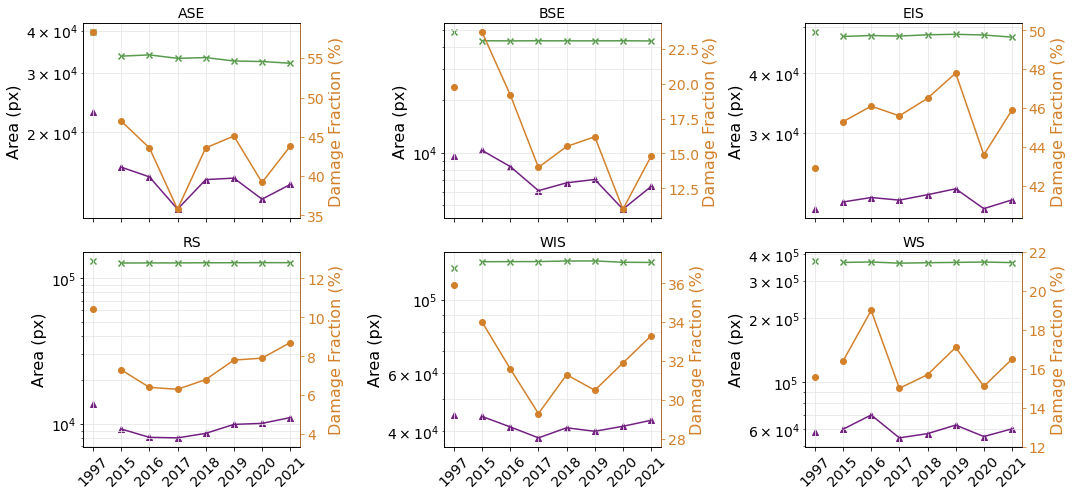

In [46]:

df_sector_sum = df_data.groupby(['sector_ID','time']).sum().reset_index()

## calculate baseline for Npx

# for s in range(0,len(sectors)):
#     df_sector_tmp = df_sector_sum.loc[df_sector_sum['sector_ID']==sectors[s]]
#     print(sectors[s], df_sector_tmp.min()['Npx'],df_sector_tmp.min()['#DMG'] )
# # Npx_baseline_sectors = {'ASE':334000, 'BSE':497000,'EIS':420000,'RS':1696000,'WIS':878000,'WS':3241000} # for 400m res
# # Npx_baseline_sectors = {'ASE':31000, 'BSE':43000,'EIS':47000,'RS':126000,'WIS':124000,'WS':363000} # for 1000m res 
# Npx_baseline_sectors = {'ASE':32000, 'BSE':44000,'EIS':48000,'RS':126000,'WIS':123000,'WS':358000} # for 1000m res || to make similar to DMG
# ## Subtract baseline from Npx, and plot that for bar. so that eaach sector has similar roder of magintude +N on y-scale
# df_sector_sum['Npx_base'] = df_sector_sum['Npx']
# for s in range(0,len(sectors)):
#     # print(sectors[s])
#     df_sector_sum.loc[df_sector_sum['sector_ID']==sectors[s],'Npx_base']=df_sector_sum['Npx']-Npx_baseline_sectors[sectors[s]]


df_nerd = df_sector_sum[~df_sector_sum['time'].between(2004, 2014)].copy()
df_nerd['Dfrac'] = (df_nerd['#DMG']/df_nerd['Npx']*100).round(1) 




''' -----------------
## SUBPLOTS REGION
----------------- '''

# fig, axs = plt.subplots(2, 3, figsize=(15, 7), sharex=True ) 
# r=0;c=0
# for sector_ID in sector_IDs:
#     data_plot = df_nerd.loc[df_nerd['sector_ID'] == sector_ID]
#     ax = axs[r, c]

#     ax, ax2 = plot_axes_area_dmg(ax, data_plot, 
#                         yvar_left=('#DMG', 'Damage area (px)'), 
#                         yvar_right=('Npx', 'Ice shelf area(px)'), 
#                         yscale_log=False,
#                         ax_title = sector_ID,
#                         )

#     c+=1; 
#     if c>2:  c=0; r+=1
# fig.tight_layout()


### SAVE FIGURE
# fname = 'plot_timeseries_Area-DMG_annual_sectors'
# print('.. Saving ', fname)
# fig.savefig(os.path.join(path2savefig,'bar_plots',fname+'.png' ), bbox_inches='tight')
# fig.savefig(os.path.join(path2savefig,'bar_plots',fname+'.jpg' ), bbox_inches='tight')

fig, axs = plt.subplots(2, 3, figsize=(15, 7), sharex=True )  #(15,7)
r=0;c=0
for sector_ID in sector_IDs:
    data_plot = df_nerd.loc[df_nerd['sector_ID'] == sector_ID]
    ax = axs[r, c]

    ax, ax2 = plot_axes_area_dmg_dfrac(ax, data_plot, 
                        yvar_left1=('#DMG', 'Damage area (px)'), 
                        yvar_left2=('Npx', 'Ice shelf area(px)'), 
                        # yvar_left2=('Npx_base', 'Ice shelf area(px)'), 
                        yvar_right=('Dfrac', 'Dfrac(%)'),
                        yscale_log=True,
                        ax_title = sector_ID,
                        add_legend=False
                        )
    # tmp: dummy right axis
    # ax2.set_ylabel('xx')


    c+=1; 
    if c>2:  c=0; r+=1
fig.tight_layout()


# ### SAVE FIGURE
# fname = 'plot_timeseries_Area-DMG-Dfrac_annual_sectors_log' #_log_b'
# print('.. Saving ', fname)
# fig.savefig(os.path.join(path2savefig,'bar_plots',fname+'.png' ), bbox_inches='tight')
# fig.savefig(os.path.join(path2savefig,'bar_plots',fname+'.jpg' ), bbox_inches='tight')
df_nerd



In [48]:

df_nerd[df_nerd['time'].isin([1997,2021])]

,sector_ID,time,Dsum,Npx,#DMG,#noDMG,#nodata,#lowDMG,#mediumDMG,#highDMG,Dfrac
0,ASE,1997,544.534587,39546,23044,15898,604,10063,11410,1571,58.3
10,ASE,2021,407.335546,32031,14035,17851,145,5474,6781,1780,43.8
11,BSE,1997,272.680592,48453,9594,38859,0,5221,3621,752,19.8
21,BSE,2021,149.899741,43229,6410,36819,0,3682,2032,696,14.8
22,EIS,1997,604.525590,48679,20884,27338,457,9377,9746,1761,42.9
32,EIS,2021,486.249962,47559,21836,25230,493,11350,8754,1732,45.9
33,RS,1997,430.113422,130887,13588,33535,83764,4921,6671,1996,10.4
43,RS,2021,430.342998,127341,11035,33650,82656,4239,4082,2714,8.7
44,WIS,1997,1193.976629,124606,44681,67359,12566,21237,19491,3953,35.9
54,WIS,2021,960.587526,129518,43155,73778,12585,23286,15983,3886,33.3


## Plot AIS wide timeseries

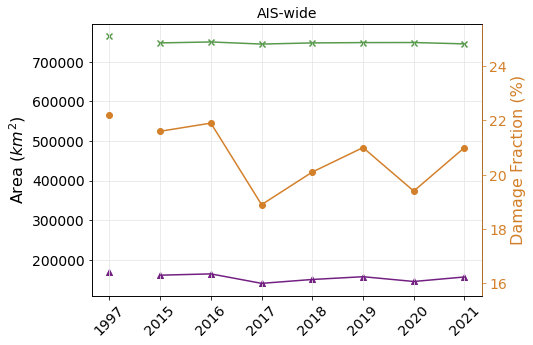

In [23]:

''' -----------------
## SINGLE PLOT  AIS
----------------- '''

df_sector_sum = df_data.groupby(['time']).sum().reset_index()
df_sector_sum['Dfrac'] = (df_sector_sum['#DMG']/df_sector_sum['Npx']*100).round(1) 
df_nerd = df_sector_sum[~df_sector_sum['time'].between(2004, 2014)].copy()


## area in km2 instead of px
px_res = 1000 ## used downsampled data
df_nerd['Area(km2)'] = df_nerd['Npx']*px_res*px_res/(1e6)
df_nerd['DMG(km2)'] = df_nerd['#DMG']*px_res*px_res/(1e6)

data_plot = df_nerd # .loc[df_nerd['NAME'] == ishelf]


# fig, axs = plt.subplots(1, figsize=(8, 5), sharex=True ) 
# ax = axs
# ax, ax2 = plot_axes_area_dmg(ax, data_plot, 
#                     yvar_left=('#DMG', 'Damage area (px)'), 
#                     yvar_right=('Npx', 'Ice shelf area(px)'), 
#                     yscale_log=False,
#                     ax_title = 'AIS-wide',
#                     )


# ### SAVE FIGURE
# # fname = 'plot_timeseries_Area-DMG_annual_AIS'
# # print('.. Saving ', fname)
# # fig.savefig(os.path.join(path2savefig,'bar_plots',fname+'.png' ), bbox_inches='tight')
# # fig.savefig(os.path.join(path2savefig,'bar_plots',fname+'.jpg' ), bbox_inches='tight')


fig, axs = plt.subplots(1, figsize=(7, 5), sharex=True ) 
ax = axs
ax, ax2 = plot_axes_area_dmg_dfrac(ax, data_plot, 
                    # yvar_left1=('#DMG', 'Damage area (px)'), 
                    # yvar_left2=('Npx', 'Ice shelf area(px)'), 
                    yvar_left1=('DMG(km2)', 'Damaged area (km2)'), 
                    yvar_left2=('Area(km2)', 'Ice shelf area (km2)'), 
                    yvar_right=('Dfrac', 'Dfrac(%)'),
                    yscale_log=False,
                    ax_title = 'AIS-wide',
                    )

ax.get_legend().remove()
# ax.set_yscale('log')

### SAVE FIGURE
# fname = 'plot_timeseries_Area-DMG-Dfrac_annual_AIS'
# print('.. Saving ', fname)
# # fig.savefig(os.path.join(path2savefig,'bar_plots',fname +'.png'), bbox_inches='tight')
# # # fig.savefig(os.path.join(path2savefig,'bar_plots',fname+'.jpg' ), bbox_inches='tight')
# fig.savefig(os.path.join(path2savefig,'bar_plots',fname+'.pdf' ), bbox_inches='tight')


### plot all Dfrac changes for all ice shelves 

In [24]:

# df_sector_sum = df_data.groupby(['NAME','time']).sum().reset_index()
# df_sector_sum['Dfrac'] = (df_sector_sum['#DMG']/df_sector_sum['Npx']*100).round(1) 
df_nerd = df_data[~df_data['time'].between(2004, 2014)].copy().reset_index()
df_nerd['Dfrac'] = (df_nerd['#DMG']/df_nerd['Npx']*100).round(1) 
df_nerd


''' -----------------
plot
----------------- '''
# fig, axs = plt.subplots(1, figsize=(7, 5) ) 
ax2=axs
''' Dmg Frac'''
yvar = 'Dfrac'; yname='Damage Fraction (%)'
ycol = '#d3802b'; ystyle='o';


# sns.lineplot(data=df_nerd.loc[df_nerd['time']>2014], x='time',y='Dfrac',hue='NAME',legend=False)

# sns.catplot(data=df_nerd.loc[df_nerd['time']>2014], x='time',y='Dfrac',hue='NAME',
#                 kind='point',
#                 legend=False, col='sector_ID')


# h2 = ax2.plot(x2[1:], data_plot.loc[data_plot['time']>2014][yvar].values, color=ycol,label='fraction')
# ax2.scatter(x2, data_plot[yvar] ,c=ycol,marker=ystyle,label='_nolegend_')# my_palette2long) 

# # if yscale_log:
# #     ax2.set_yscale('log')

# ax2.set_ylabel(yname)

# ## make sure the ylims are generous
# ylims = ax2.get_ylim()
# if np.diff(ylims) < 10:
#     # print('small % diff: ', ylims)
#     ymid = ylims[0]+ np.diff(ylims)/2
#     ylim_new = [ymid-5, ymid+5]
#     ax2.set_ylim(ylim_new)


# # Set the color of the right-hand sided y-axis label and tick labels
# ax2.yaxis.label.set_color(ycol)
# ax2.tick_params(axis='y', colors=ycol,which='both') # doesnt work
# ax2.spines['right'].set_color(ycol)


# df_nerd

## save values to excel

In [26]:
# df_ishelf_save

In [27]:
df_ishelf_save = df_nerd[['NAME','sector_ID','time','Npx','#DMG','Dfrac']]#.sort_values(['sector_ID','NAME','time'])
fname = 'damage_area_iceshelves.xlsx'
print('.. saving to ',fname)
# df_ishelf_save.to_excel(os.path.join(homedir,'Data/NERD/',fname), header=True, index=False, sheet_name='overview')
saveTrue=False
if saveTrue: 
    with pd.ExcelWriter(os.path.join(homedir,'Data/NERD/',fname)) as writer:  
        # overview table
        df_ishelf_save.to_excel(writer, sheet_name='overview', na_rep=-999)

        # timeseires per variable: Npx
        df_pivot = df_ishelf_save.pivot_table(index=['NAME','sector_ID'], columns='time', values='Npx')
        df_pivot.columns = [f'{x}' for x in df_pivot.columns]
        df_pivot = df_pivot.reset_index()#.sort_values(['sector_ID','NAME'])
        df_pivot.to_excel(writer, sheet_name='iceShelf_area', na_rep=-999, inf_rep=-999, header=True, index=False,)

        # timeseires per variable: DMG
        df_pivot = df_ishelf_save.pivot_table(index=['NAME','sector_ID'], columns='time', values='#DMG')
        df_pivot.columns = [f'{x}' for x in df_pivot.columns]
        df_pivot = df_pivot.reset_index()#.sort_values(['sector_ID','NAME'])
        df_pivot.to_excel(writer, sheet_name='damaged_area', na_rep=-999, inf_rep=-999, header=True, index=False,)

        # timeseires per variable: Dfrac
        df_pivot = df_ishelf_save.pivot_table(index=['NAME','sector_ID'], columns='time', values='Dfrac')
        df_pivot.columns = [f'{x}' for x in df_pivot.columns]
        df_pivot = df_pivot.reset_index()#.sort_values(['sector_ID','NAME'])
        df_pivot.to_excel(writer, sheet_name='damage_fraction', na_rep=-999, inf_rep=-999, header=True, index=False,)

        ## Dfrac per sector
        IDs=list(df_pivot['sector_ID'].unique())
        IDs.sort()
        for sector_ID in IDs:
            df_piv_sect = df_pivot[df_pivot['sector_ID']==sector_ID]
            df_piv_sect.to_excel(writer, sheet_name='Dfrac_'+sector_ID, na_rep=-999, inf_rep=-999, header=True, index=False,)

.. saving to  damage_area_iceshelves.xlsx


# Values and stuff
## AIS wide values long term


In [28]:
### AIS WIDE: values
df_sector_sum = df_data.groupby(['time']).sum().reset_index()  # downsampled 400m res to 1000m 
# df_sector_sum = df_data_1000.groupby(['time']).sum().reset_index()  # processed 1000m res
df_sector_sum['Dfrac'] = (df_sector_sum['#DMG']/df_sector_sum['Npx']*100).round(1) 
df_nerd = df_sector_sum[~df_sector_sum['time'].between(2004, 2014)]

df_tmp = df_nerd[df_nerd['time'].isin([1997,2021])].copy()
px_res = 1000

display(df_nerd)

## long term diff:
# df_diff_lt =df_nerd[df_nerd['time'].isin([1997,2021])].diff()*px_res*px_res/(1e6)
# print('long term diff ABSOLUTE (Npx * 400 * 400 / 1e6 (km2)')
# display(df_diff_lt)
# print('long term diff PCT_CHANGE')
# display(df_nerd[df_nerd['time'].isin([1997,2021])].pct_change()*100)

# D_97 = df_nerd.loc[df_nerd['time'] == 1997]['#DMG'].values
# D_21 = df_nerd.loc[df_nerd['time'] == 2021]['#DMG'].values
# D_97, D_21, D_21-D_97, (D_21-D_97)/D_97*100
print(df_nerd[df_nerd['time']==1997]['#DMG'].values[0])
print('total ice shelf area 1997 {} km2'.format(  df_nerd[df_nerd['time']==1997]['Npx'].values[0]*px_res*px_res/(1e6) ) )
print('total dmg area 1997 {} km2'.format(  df_nerd[df_nerd['time']==1997]['#DMG'].values[0]*px_res*px_res/(1e6) ) )
print('PANG dmg area 2004 = 44744.59, 2009 = 42700, 2014=42980')
print('PANG changes: {}'.format( (42980-44744)/44744 * 100))
# print('PANG dmg area 2014=42980 km2')
# print('NeRD dmg area 2015={} km2; '.format(  df_nerd[df_nerd['time']==2015]['#DMG'].values[0]*px_res*px_res/(1e6) ) )

df_tmp[['Ddiff(km2)','Adiff(km2)']] = df_tmp[['#DMG','Npx']].transform(lambda x: x.diff())*px_res*px_res/(1e6)
df_tmp[['Dpct','Apct']] = df_tmp[['#DMG','Npx']].transform(lambda x: x.pct_change())*100
df_tmp = df_tmp.dropna(axis=0)
display(df_tmp[['Ddiff(km2)','Adiff(km2)','Dpct','Apct']])


,time,Dsum,Npx,#DMG,#noDMG,#nodata,#lowDMG,#mediumDMG,#highDMG,Dfrac
0,1997,4347.294508,764407,169830,371713,222864,78739,77163,13928,22.2
4,2015,3665.852624,747634,161176,365544,220914,85643,60764,14769,21.6
5,2016,3713.269682,750049,164426,364576,221047,89872,58936,15618,21.9
6,2017,3297.661603,744676,140527,383113,221036,73084,54004,13439,18.9
7,2018,3644.526572,747618,150331,376151,221136,77134,57468,15729,20.1
8,2019,3884.647184,748438,157298,369905,221235,79304,61085,16909,21.0
9,2020,3356.100787,748601,145254,382293,221054,76136,55606,13512,19.4
10,2021,3688.687054,745186,156646,367416,221124,81641,59386,15619,21.0


169830
total ice shelf area 1997 764407.0 km2
total dmg area 1997 169830.0 km2
PANG dmg area 2004 = 44744.59, 2009 = 42700, 2014=42980
PANG changes: -3.942428035043805


,Ddiff(km2),Adiff(km2),Dpct,Apct
10,-13184.0,-19221.0,-7.763057,-2.514498


In [29]:
### PER SECTOR
df_sector_sum = df_data.groupby(['sector_ID','time']).sum().reset_index()
# df_sector_sum = df_data_1000.groupby(['sector_ID','time']).sum().reset_index()

df_sector_sum['Dfrac'] = (df_sector_sum['#DMG']/df_sector_sum['Npx']*100).round(1) 
df_nerd = df_sector_sum[~df_sector_sum['time'].between(2004, 2014)]
df_sec_tmp = df_nerd[df_nerd['time'].isin([1997,2021])].copy()

display(df_sec_tmp)
# display(df_nerd) 

## long term diff:
# df_diff_lt =df_nerd.diff()*400*400/(1e6)
# print('long term diff ABSOLUTE (Npx * 400 * 400 / 1e6 (km2)')
# display(df_diff_lt)
# 
df_sec_tmp[['Ddiff(km2)','Adiff(km2)']] = df_sec_tmp.groupby(['sector_ID'])[['#DMG','Npx']].transform(lambda x: x.diff())*400*400/(1e6)
df_sec_tmp[['Dpct','Apct']] = df_sec_tmp.groupby(['sector_ID'])[['#DMG','Npx']].transform(lambda x: x.pct_change())*100
df_sec_tmp = df_sec_tmp.dropna(axis=0)
display(df_sec_tmp[['sector_ID','Ddiff(km2)','Adiff(km2)','Dpct','Apct']])

df_sec_tmp[['Ddiff(km2)','Adiff(km2)','Dpct','Apct']].describe()
# print('long term diff PCT_CHANGE')
# display(df_nerd[df_nerd['time'].isin([1997,2021])].pct_change()*100)

# D_97 = df_nerd.loc[df_nerd['time'] == 1997]['#DMG'].values
# D_21 = df_nerd.loc[df_nerd['time'] == 2021]['#DMG'].values
# D_97, D_21, D_21-D_97, (D_21-D_97)/D_97*100

# print('total ice shelf area 1997 {} km2'.format(  764407*400*400/(1e6) ) )

,sector_ID,time,Dsum,Npx,#DMG,#noDMG,#nodata,#lowDMG,#mediumDMG,#highDMG,Dfrac
0,ASE,1997,544.534587,39546,23044,15898,604,10063,11410,1571,58.3
10,ASE,2021,407.335546,32031,14035,17851,145,5474,6781,1780,43.8
11,BSE,1997,272.680592,48453,9594,38859,0,5221,3621,752,19.8
21,BSE,2021,149.899741,43229,6410,36819,0,3682,2032,696,14.8
22,EIS,1997,604.525590,48679,20884,27338,457,9377,9746,1761,42.9
32,EIS,2021,486.249962,47559,21836,25230,493,11350,8754,1732,45.9
33,RS,1997,430.113422,130887,13588,33535,83764,4921,6671,1996,10.4
43,RS,2021,430.342998,127341,11035,33650,82656,4239,4082,2714,8.7
44,WIS,1997,1193.976629,124606,44681,67359,12566,21237,19491,3953,35.9
54,WIS,2021,960.587526,129518,43155,73778,12585,23286,15983,3886,33.3


,sector_ID,Ddiff(km2),Adiff(km2),Dpct,Apct
10,ASE,-1441.44,-1202.40,-39.094775,-19.003186
21,BSE,-509.44,-835.84,-33.187409,-10.781582
32,EIS,152.32,-179.20,4.558514,-2.300787
43,RS,-408.48,-567.36,-18.788637,-2.709207
54,WIS,-244.16,785.92,-3.415322,3.942025
65,WS,341.76,-1076.48,3.680284,-1.807455


,Ddiff(km2),Adiff(km2),Dpct,Apct
count,6.000000,6.000000,6.000000,6.000000
mean,-351.573333,-512.560000,-14.374558,-5.443365
std,626.438637,734.653277,18.915813,8.136610
min,-1441.440000,-1202.400000,-39.094775,-19.003186
25%,-484.200000,-1016.320000,-29.587716,-8.763488
50%,-326.320000,-701.600000,-11.101979,-2.504997
75%,53.200000,-276.240000,1.906382,-1.930788
max,341.760000,785.920000,4.558514,3.942025


##### Calculate range for long term change of all ice shevles

,NAME,time,Dsum,Npx,#DMG,#noDMG,Ddiff(km2),Adiff(km2),Dpct,Apct
2,Chugunov,2021,1.058034,12,12,0,1.76,1.60,1100.000000,500.000000
7,LarsenC,2021,66.512388,43256,6823,36433,591.20,-810.56,118.126598,-10.483838


,Ddiff(km2),Adiff(km2),Dpct,Apct
count,119.000000,119.000000,119.000000,119.000000
mean,-17.836639,-26.031597,-4.821318,-1.707437
std,138.809895,192.530006,106.981625,53.174929
min,-853.440000,-964.800000,-100.000000,-100.000000
25%,-17.280000,-8.960000,-32.216216,-12.091244
50%,-3.040000,-0.640000,-14.285714,-2.086927
75%,0.080000,0.880000,0.250358,3.471706
max,682.240000,720.000000,1100.000000,500.000000


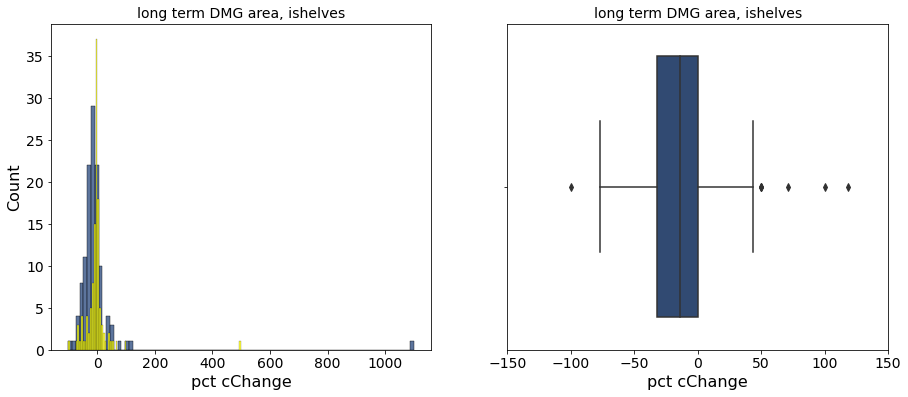

In [30]:
df_numerical = df_data[['NAME','time','Dsum','Npx','#DMG','#noDMG']][df_data['time'].isin([1997,2021])]
# df_numerical = df_data_1000[['NAME','time','Dsum','Npx','#DMG','#noDMG']]#[df_data['time'].isin([1997,2021])]

# ## percent Change (%) of each ice shelf from 1997 to 2021;; this drops the Name row
# df_pctChange_ishelf = df_numerical.groupby(['NAME']).pct_change().dropna(axis=0)*100
# df_pctChange_ishelf

## percent Change (%) of each ice shelf from 1997 to 2021;; this keeps the name row
df_pctChange_ishelf = df_numerical.copy()
df_pctChange_ishelf[['Ddiff(km2)','Adiff(km2)']] = df_pctChange_ishelf.groupby(['NAME'])[['#DMG','Npx']].transform(lambda x: x.diff())*400*400/(1e6)
df_pctChange_ishelf[['Dpct','Apct']] = df_pctChange_ishelf.groupby(['NAME'])[['#DMG','Npx']].transform(lambda x: x.pct_change())*100
df_pctChange_ishelf = df_pctChange_ishelf.dropna(axis=0)

'''
## PRINT AND PLOT histogram of values
'''

## Plot values
fig,axs=plt.subplots(1,2,figsize=(15,6))#, sharex=True)
ax=axs[0]
ax= sns.histplot(data=df_pctChange_ishelf, x='Dpct', ax=ax,
                color = my_palette2long[-1],legend=False, 
                )  
sns.histplot(data=df_pctChange_ishelf, x='Apct', ax=ax,
                color = 'yellow',legend=False, 
                )                
ax.set_title('long term DMG area, ishelves')
ax.set_xlabel('pct cChange')
ax=axs[1]
sns.boxplot(data=df_pctChange_ishelf, x='Dpct', ax=ax,
             color = my_palette2long[-1],
                )                
ax.set_title('long term DMG area, ishelves')
ax.set_xlabel('pct cChange'); ax.set_xlim([-150,150])

# df_pctChange_ishelf.loc[df_pctChange_ishelf['#DMG']> 100]
display(df_pctChange_ishelf.loc[df_pctChange_ishelf['Dpct']> 100])

#  Chugunov and Larsen C ice shelves have pct change > 100...
# tmp = df_data[df_data['time'].isin([1997,2021])]
# display( df_numerical[df_numerical['NAME'].isin(['Chugunov','LarsenC'])])


df_pctChange_ishelf[['Ddiff(km2)','Adiff(km2)','Dpct','Apct']].describe()#percentiles=[0.5, 0.05, 0.95])

## Recent dmg change

### 1997 to 2017

In [31]:
### AIS WIDE: values
df_sector_sum = df_data.groupby(['time']).sum().reset_index()  # downsampled 400m res to 1000m 
# df_sector_sum = df_data_1000.groupby(['time']).sum().reset_index()  # processed 1000m res
df_sector_sum['Dfrac'] = (df_sector_sum['#DMG']/df_sector_sum['Npx']*100).round(1) 
df_nerd = df_sector_sum[~df_sector_sum['time'].between(2004, 2014)]

y0 = 1997
y1 = 2017
df_tmp = df_nerd[df_nerd['time'].isin([y0,y1])].copy()
px_res = 1000

display(df_nerd)

print(f'{y0}-{y1}')
print('total ice shelf area y0 {} km2'.format(  df_nerd[df_nerd['time']==y0]['Npx'].values[0]*px_res*px_res/(1e6) ) )
print('total dmg area y0 {} km2'.format(  df_nerd[df_nerd['time']==y0]['#DMG'].values[0]*px_res*px_res/(1e6) ) )

df_tmp[['Ddiff(km2)','Adiff(km2)']] = df_tmp[['#DMG','Npx']].transform(lambda x: x.diff())*px_res*px_res/(1e6)
df_tmp[['Dpct','Apct']] = df_tmp[['#DMG','Npx']].transform(lambda x: x.pct_change())*100
df_tmp = df_tmp.dropna(axis=0)
display(df_tmp[['Ddiff(km2)','Adiff(km2)','Dpct','Apct']])


,time,Dsum,Npx,#DMG,#noDMG,#nodata,#lowDMG,#mediumDMG,#highDMG,Dfrac
0,1997,4347.294508,764407,169830,371713,222864,78739,77163,13928,22.2
4,2015,3665.852624,747634,161176,365544,220914,85643,60764,14769,21.6
5,2016,3713.269682,750049,164426,364576,221047,89872,58936,15618,21.9
6,2017,3297.661603,744676,140527,383113,221036,73084,54004,13439,18.9
7,2018,3644.526572,747618,150331,376151,221136,77134,57468,15729,20.1
8,2019,3884.647184,748438,157298,369905,221235,79304,61085,16909,21.0
9,2020,3356.100787,748601,145254,382293,221054,76136,55606,13512,19.4
10,2021,3688.687054,745186,156646,367416,221124,81641,59386,15619,21.0


1997-2017
total ice shelf area y0 764407.0 km2
total dmg area y0 169830.0 km2


,Ddiff(km2),Adiff(km2),Dpct,Apct
6,-29303.0,-19731.0,-17.254313,-2.581217


### 2017-2021

In [32]:
### AIS WIDE: values
df_sector_sum = df_data.groupby(['time']).sum().reset_index()  # downsampled 400m res to 1000m 
# df_sector_sum = df_data_1000.groupby(['time']).sum().reset_index()  # processed 1000m res
df_sector_sum['Dfrac'] = (df_sector_sum['#DMG']/df_sector_sum['Npx']*100).round(1) 
df_nerd = df_sector_sum[~df_sector_sum['time'].between(2004, 2014)]

y0 = 2017
y1 = 2021
df_tmp = df_nerd[df_nerd['time'].isin([y0,y1])].copy()
px_res = 1000

display(df_nerd)

print(f'{y0}-{y1}')
print('total ice shelf area y0 {} km2'.format(  df_nerd[df_nerd['time']==y0]['Npx'].values[0]*px_res*px_res/(1e6) ) )
print('total dmg area y0 {} km2'.format(  df_nerd[df_nerd['time']==y0]['#DMG'].values[0]*px_res*px_res/(1e6) ) )

df_tmp[['Ddiff(km2)','Adiff(km2)']] = df_tmp[['#DMG','Npx']].transform(lambda x: x.diff())*px_res*px_res/(1e6)
df_tmp[['Dpct','Apct']] = df_tmp[['#DMG','Npx']].transform(lambda x: x.pct_change())*100
df_tmp = df_tmp.dropna(axis=0)
display(df_tmp[['Ddiff(km2)','Adiff(km2)','Dpct','Apct']])


,time,Dsum,Npx,#DMG,#noDMG,#nodata,#lowDMG,#mediumDMG,#highDMG,Dfrac
0,1997,4347.294508,764407,169830,371713,222864,78739,77163,13928,22.2
4,2015,3665.852624,747634,161176,365544,220914,85643,60764,14769,21.6
5,2016,3713.269682,750049,164426,364576,221047,89872,58936,15618,21.9
6,2017,3297.661603,744676,140527,383113,221036,73084,54004,13439,18.9
7,2018,3644.526572,747618,150331,376151,221136,77134,57468,15729,20.1
8,2019,3884.647184,748438,157298,369905,221235,79304,61085,16909,21.0
9,2020,3356.100787,748601,145254,382293,221054,76136,55606,13512,19.4
10,2021,3688.687054,745186,156646,367416,221124,81641,59386,15619,21.0


2017-2021
total ice shelf area y0 744676.0 km2
total dmg area y0 140527.0 km2


,Ddiff(km2),Adiff(km2),Dpct,Apct
10,16119.0,510.0,11.470394,0.068486


### 2015-2021

In [33]:
### PER SECTOR
df_sector_sum = df_data.groupby(['sector_ID','time']).sum().reset_index()
# df_sector_sum = df_data_1000.groupby(['sector_ID','time']).sum().reset_index()

df_sector_sum['Dfrac'] = (df_sector_sum['#DMG']/df_sector_sum['Npx']*100).round(1) 
df_nerd = df_sector_sum[~df_sector_sum['time'].between(2004, 2014)]
df_sec_tmp = df_nerd[df_nerd['time'].isin([2015,2021])].copy()

display(df_sec_tmp)
# display(df_nerd) 

## long term diff:
# df_diff_lt =df_nerd.diff()*400*400/(1e6)
# print('long term diff ABSOLUTE (Npx * 400 * 400 / 1e6 (km2)')
# display(df_diff_lt)
# 
df_sec_tmp[['Ddiff(km2)','Adiff(km2)']] = df_sec_tmp.groupby(['sector_ID'])[['#DMG','Npx']].transform(lambda x: x.diff())*400*400/(1e6)
df_sec_tmp[['Dpct','Apct']] = df_sec_tmp.groupby(['sector_ID'])[['#DMG','Npx']].transform(lambda x: x.pct_change())*100
df_sec_tmp = df_sec_tmp.dropna(axis=0)
display(df_sec_tmp[['sector_ID','Ddiff(km2)','Adiff(km2)','Dpct','Apct']])

df_sec_tmp[['Ddiff(km2)','Adiff(km2)','Dpct','Apct']].describe()
# print('long term diff PCT_CHANGE')
# display(df_nerd[df_nerd['time'].isin([1997,2021])].pct_change()*100)


,sector_ID,time,Dsum,Npx,#DMG,#noDMG,#nodata,#lowDMG,#mediumDMG,#highDMG,Dfrac
4,ASE,2015,418.875696,33614,15792,17677,145,6608,7531,1653,47.0
10,ASE,2021,407.335546,32031,14035,17851,145,5474,6781,1780,43.8
15,BSE,2015,174.500461,43352,10283,33069,0,7120,2451,712,23.7
21,BSE,2021,149.899741,43229,6410,36819,0,3682,2032,696,14.8
26,EIS,2015,477.751899,47713,21618,25633,462,10783,9196,1639,45.3
32,EIS,2021,486.249962,47559,21836,25230,493,11350,8754,1732,45.9
37,RS,2015,275.523419,126565,9218,34691,82656,4176,3694,1348,7.3
43,RS,2021,430.342998,127341,11035,33650,82656,4239,4082,2714,8.7
48,WIS,2015,957.802220,130174,44321,73192,12661,24310,16551,3460,34.0
54,WIS,2021,960.587526,129518,43155,73778,12585,23286,15983,3886,33.3


,sector_ID,Ddiff(km2),Adiff(km2),Dpct,Apct
10,ASE,-281.12,-253.28,-11.125887,-4.709347
21,BSE,-619.68,-19.68,-37.664106,-0.283724
32,EIS,34.88,-24.64,1.008419,-0.322763
43,RS,290.72,124.16,19.711434,0.613124
54,WIS,-186.56,-104.96,-2.630807,-0.503941
65,WS,36.96,-113.28,0.385360,-0.193329


,Ddiff(km2),Adiff(km2),Dpct,Apct
count,6.000000,6.000000,6.000000,6.000000
mean,-120.800000,-65.280000,-5.052598,-0.899997
std,315.398581,125.571482,18.898809,1.906301
min,-619.680000,-253.280000,-37.664106,-4.709347
25%,-257.480000,-111.200000,-9.002117,-0.458646
50%,-75.840000,-64.800000,-1.122724,-0.303244
75%,36.440000,-20.920000,0.852654,-0.215927
max,290.720000,124.160000,19.711434,0.613124


# Scatterplot Area-change and Damage-change (per ice shelf)

In [23]:
df_data ## per ice hself per year

df_change = df_data[~df_data['time'].between(2004, 2014)].copy().reset_index()
df_change = df_change[['NAME','time','Npx','#DMG','sector_ID','#mediumDMG','#highDMG']]
df_change['Dfrac'] = (df_change['#DMG']/df_change['Npx']*100).round(1) 

# df_sector_sum['Npx_pct_change'] = df_sector_sum.groupby(['sector_ID'])['Npx'].pct_change() #.fillna(0)
df_change['deltaArea(%)'] = df_change.groupby(['NAME'])['Npx'].pct_change()
df_change['deltaDmg(%)'] = df_change.groupby(['NAME'])['#DMG'].pct_change()
df_change['deltaDmg-med(%)'] = df_change.groupby(['NAME'])['#mediumDMG'].pct_change()
df_change['deltaDmg-hi(%)'] = df_change.groupby(['NAME'])['#highDMG'].pct_change()
df_change['deltaDfrac'] = df_change.groupby(['NAME'])['Dfrac'].diff()
df_change['deltaArea'] = df_change.groupby(['NAME'])['Npx'].diff()
df_change['deltaDmg'] = df_change.groupby(['NAME'])['#DMG'].diff()
df_change


,NAME,time,Npx,#DMG,sector_ID,#mediumDMG,#highDMG,Dfrac,deltaArea(%),deltaDmg(%),deltaDmg-med(%),deltaDmg-hi(%),deltaDfrac,deltaArea,deltaDmg
0,Underwood,1997,158,112,EIS,33,4,70.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Vincennes_Bay,1997,668,533,EIS,249,69,79.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fox,1997,27,27,EIS,11,12,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Whittle,1997,87,83,EIS,68,5,95.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Williamson,1997,175,171,EIS,119,3,97.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,Dalk,2021,45,45,WIS,19,26,100.0,0.000000,0.000000,0.461538,-0.187500,0.0,0.0,0.0
1416,Flatnes,2021,67,65,WIS,15,38,97.0,0.000000,0.031746,-0.166667,0.055556,3.0,0.0,2.0
1417,Hovde,2021,18,18,WIS,6,12,100.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1418,Sorsdal,2021,135,135,WIS,89,16,100.0,-0.709052,-0.707158,-0.744253,-0.724138,0.6,-329.0,-326.0


r_value 0.841, p_value: 4.102047e-222


Text(0, 0.5, 'Damaged area change (%)')

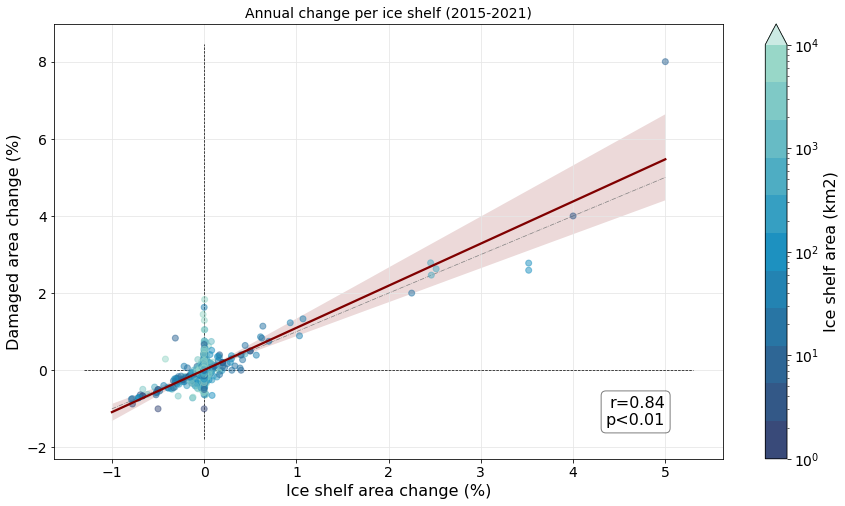

In [25]:
df_change = df_change.dropna(subset=['deltaArea(%)','deltaDmg(%)'])
inf_rows = df_change[df_change['deltaDmg(%)'].isin([np.inf, -np.inf])]
df_change = df_change.drop(inf_rows.index)

from sklearn.metrics import r2_score
R2 = r2_score(df_change['deltaArea(%)'], df_change['deltaDmg(%)'] )
R = np.sqrt(R2)

from scipy import stats
slope, intercept, r_value, p_value, _ = stats.linregress(df_change['deltaArea(%)'],df_change['deltaDmg(%)'])
print('r_value {:.3f}, p_value: {:e}'.format(r_value, p_value))

''' ----------------
Percent change with regression
---------------- '''

alph = 0.5; 
c_var = df_change['Npx']; Npx_vmax = 6000
c_map = cmap_blues.reversed()


# Create a custom colormap with a log scale
log_norm = mcolors.LogNorm(vmin=1, vmax=1e4)

fig,ax=plt.subplots(1,figsize=(15,8))
ax.grid('major',color=[0.9, 0.9, 0.9])
sc = ax.scatter(df_change['deltaArea(%)'], df_change['deltaDmg(%)'], c=df_change['Npx'], 
            cmap=cmap_blues.reversed(), #vmin=0,vmax=Npx_vmax,
            norm=log_norm,
            alpha=alph, edgecolor=None, zorder=3)
sns.regplot(data=df_change, x='deltaArea(%)', y='deltaDmg(%)', ax=ax, scatter=False, color='maroon')
plt.setp(ax.lines, zorder=5)
ax.vlines(0, *ax.get_ylim() ,linestyles='--',color='black', linewidth=0.7)
ax.hlines(0, *ax.get_xlim() ,linestyles='--',color='black', linewidth=0.7)
ax.set_title('Annual change per ice shelf (2015-2021)')

cbar = fig.colorbar(sc,ax=ax, extend='max',label='Ice shelf area (km2)'); cbar.solids.set(alpha=1)
# ax.annotate('R={:.2f}\n P<0.01'.format(r_value), [4,-2],fontsize=16)
# Add a box around the text
bbox_props = dict(boxstyle="square,pad=0.5", edgecolor="black", facecolor="white", lw=1)
bbox_props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.annotate('r={:.2f}\np<0.01'.format(r_value), 
                # [4.3, -1.8], 
                [5,-1.5], ha='right', va='bottom',
                fontsize=16, bbox=bbox_props)

ax.plot([-1,5], [-1,5],'-.',color='gray',linewidth=0.7, label='1:1')
ax.set_xlabel('Ice shelf area change (%)')
ax.set_ylabel('Damaged area change (%)')


### SAVE FIGURE 
# fname = 'scatter_deltaArea-deltaDMG_pctChange_wide.png'
# print('.. Saving ', fname)
# fig.savefig(os.path.join(path2savefig,'bar_plots',fname ), bbox_inches='tight')

r_value 0.841, p_value: 4.102047e-222


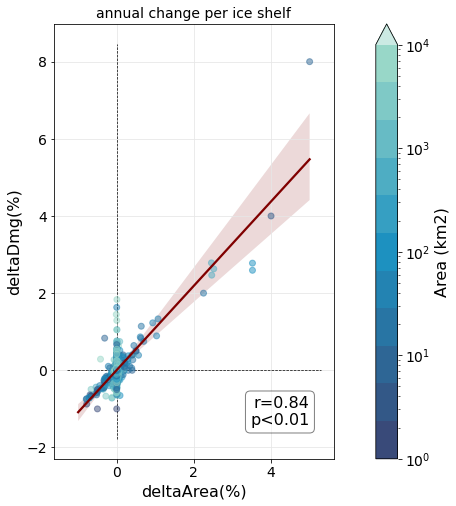

In [26]:
df_data ## per ice hself per year

df_change = df_data[~df_data['time'].between(2004, 2014)].copy().reset_index()
df_change = df_change[['NAME','time','Npx','#DMG','sector_ID','#mediumDMG','#highDMG']]
df_change['Dfrac'] = (df_change['#DMG']/df_change['Npx']*100).round(1) 

# df_sector_sum['Npx_pct_change'] = df_sector_sum.groupby(['sector_ID'])['Npx'].pct_change() #.fillna(0)
df_change['deltaArea(%)'] = df_change.groupby(['NAME'])['Npx'].pct_change()
df_change['deltaDmg(%)'] = df_change.groupby(['NAME'])['#DMG'].pct_change()
df_change['deltaDmg-med(%)'] = df_change.groupby(['NAME'])['#mediumDMG'].pct_change()
df_change['deltaDmg-hi(%)'] = df_change.groupby(['NAME'])['#highDMG'].pct_change()
df_change['deltaDfrac'] = df_change.groupby(['NAME'])['Dfrac'].diff()
df_change['deltaArea'] = df_change.groupby(['NAME'])['Npx'].diff()
df_change['deltaDmg'] = df_change.groupby(['NAME'])['#DMG'].diff()

## area in km2 instead of px
px_res = 1000 ## used downsampled data
df_change['Area(km2)'] = df_change['Npx']*px_res*px_res/(1e6)

df_change = df_change.dropna(subset=['deltaArea(%)','deltaDmg(%)'])
inf_rows = df_change[df_change['deltaDmg(%)'].isin([np.inf, -np.inf])]
df_change = df_change.drop(inf_rows.index)

from sklearn.metrics import r2_score
R2 = r2_score(df_change['deltaArea(%)'], df_change['deltaDmg(%)'] )
R = np.sqrt(R2)

from scipy import stats
slope, intercept, r_value, p_value, _ = stats.linregress(df_change['deltaArea(%)'],df_change['deltaDmg(%)'])
print('r_value {:.3f}, p_value: {:e}'.format(r_value, p_value))

''' ----------------
Percent change with regression: zoombox
---------------- '''
alph = 0.5; 

# Create a custom colormap with a log scale
log_norm = mcolors.LogNorm(vmin=1, vmax=1e4)

fig,ax=plt.subplots(1,figsize=(15,8))
ax.grid('major',color=[0.9, 0.9, 0.9])
sc = ax.scatter(df_change['deltaArea(%)'], df_change['deltaDmg(%)'], c=df_change['Area(km2)'], # ['Npx'], 
            cmap=cmap_blues.reversed(), #vmin=0,vmax=Npx_vmax,
            norm=log_norm,
            alpha=alph, 
            # edgecolor=None, 
            zorder=3)
sns.regplot(data=df_change, x='deltaArea(%)', y='deltaDmg(%)', ax=ax, scatter=False, color='maroon')
plt.setp(ax.lines, zorder=5)
ax.vlines(0, *ax.get_ylim() ,linestyles='--',color='black', linewidth=0.7)
ax.hlines(0, *ax.get_xlim() ,linestyles='--',color='black', linewidth=0.7)
ax.set_title('annual change per ice shelf')

cbar = fig.colorbar(sc,ax=ax, extend='max',label='Area (km2)'); cbar.solids.set(alpha=1)
# ax.annotate('R={:.2f}\n P<0.01'.format(r_value), [4,-2],fontsize=16)
# Add a box around the text
bbox_props = dict(boxstyle="square,pad=0.5", edgecolor="black", facecolor="white", lw=1)
bbox_props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.annotate('r={:.2f}\np<0.01'.format(r_value), 
                # [4.3, -1.8], 
                [5,-1.5], ha='right', va='bottom',
                fontsize=16, bbox=bbox_props)

# ax.set_xlim(ax.get_ylim())
# ax.set_ylim([-1.5, 2]) 
ax.set_aspect('equal')


### SAVE FIGURE
# fname = 'scatter_deltaArea-deltaDMG_pctChange_axEqual'
# print('.. Saving ', fname)
# # fig.savefig(os.path.join(path2savefig,'bar_plots',fname+'.png' ), bbox_inches='tight')
# fig.savefig(os.path.join(path2savefig,'bar_plots',fname+'.pdf' ), bbox_inches='tight')

In [ ]:
print(p_value)

4.1020466752575083e-222
